In [5]:
import pandas as pd

path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_train'
train_set = pd.read_csv(path)

In [6]:
train_set

,name,sex,mask,cape,tie,ears,smokes,class
0,batman,0,1,1,0,1,0,good
1,robin,0,1,1,0,0,0,good
2,alfred,0,0,0,1,0,0,good
3,penguin,0,0,0,1,0,1,bad
4,catwoman,1,1,0,0,1,0,bad
5,joker,0,0,0,0,0,0,bad


Goal: Identify people as good or bad from their appearance

In [38]:
# test set
test_set = pd.read_csv('https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/good_or_evil_test')
test_set

,name,sex,mask,cape,tie,ears,smokes
0,batgirl,1,1,1,0,1,0
1,riddler,0,1,0,0,0,0


In [39]:
# feature matrix X, target vector y
X_train = train_set.drop(['class','name'], axis=1)
y_train = train_set['class']
X_test = test_set.drop('name',axis=1)


In [40]:
# draw a classification tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
# features names
X_train.columns

# class names
tree_clf.classes_

array(['bad', 'good'], dtype=object)

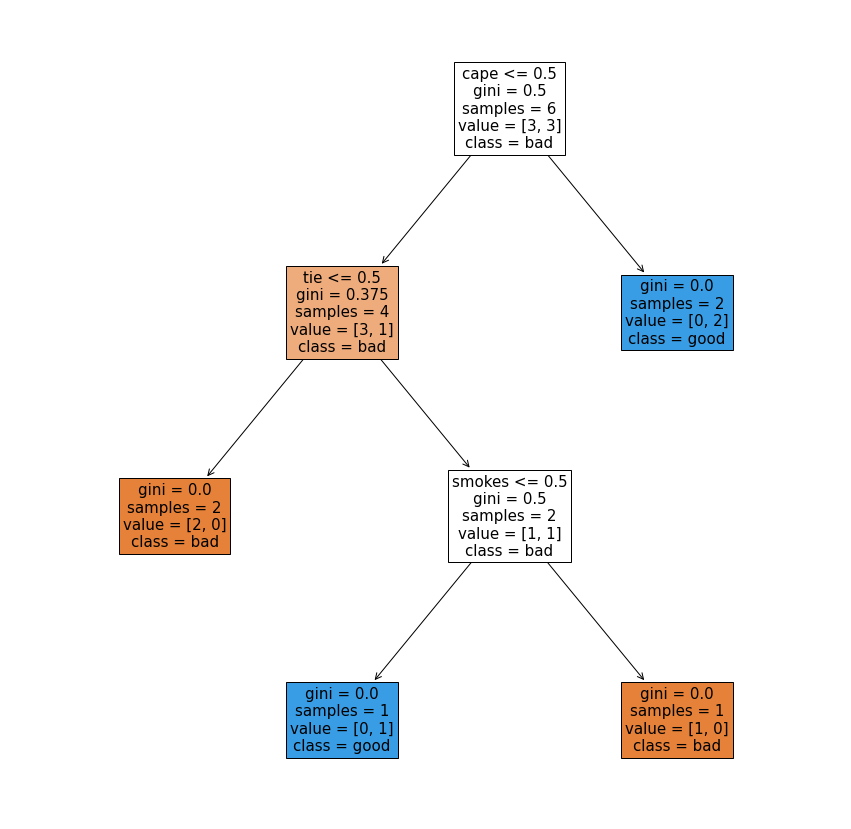

In [42]:
# plot the classification tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,15))
plot_tree(tree_clf,
         feature_names = X_train.columns,
         class_names = tree_clf.classes_,
         filled = True,
         fontsize=15)
plt.show()

In [43]:
tree_clf.predict(X_test) # this prediction is correct

array(['good', 'bad'], dtype=object)

If left unconstrained, a classifier tree will overfit the data

In [44]:
# load the Pima Indians diabetes dataset
data = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
diabetes = pd.read_csv(data)
diabetes.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [45]:
X = diabetes.drop('label', axis=1)
y = diabetes.label

In [46]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

### Parameters for Decision Tree
- max_depth - 
- max_leaf_nodes - 
- min_samples_split - min number of samples required to split a node. Typically we don't want nodes with few samples. If there's 20 samples, a min_s_split of 25 would only have 1 leaf
- min_samples_leaf - min samples required to be a leaf. Don't want node with few samples.

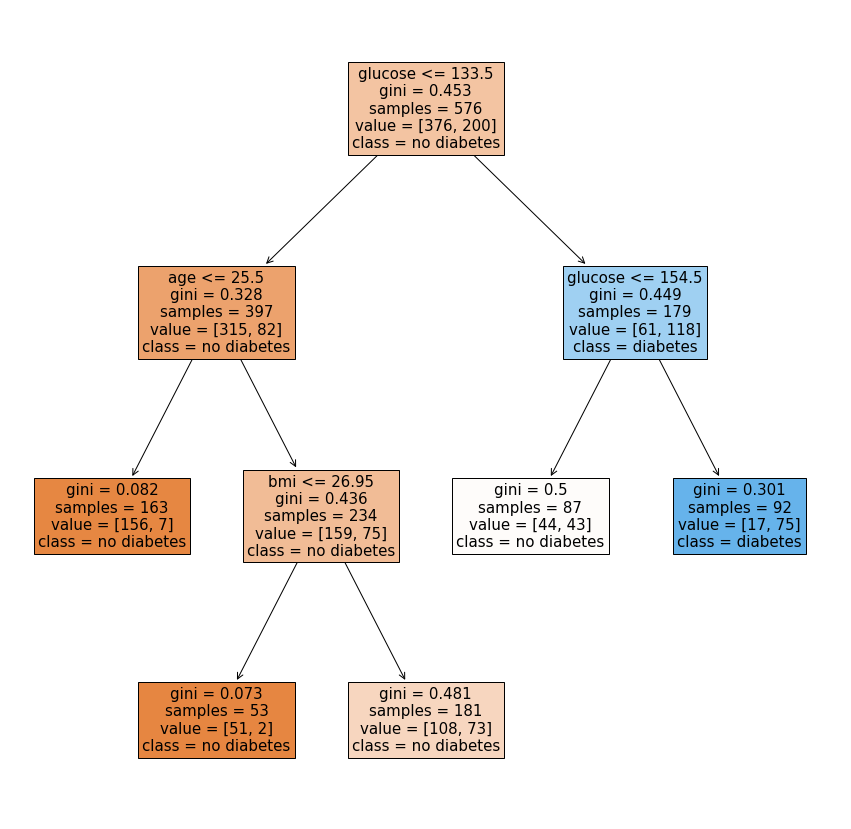

In [90]:
# fit and plot the classification tree
tree_clf = DecisionTreeClassifier(max_leaf_nodes=5) 
tree_clf.fit(X_train,y_train)
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,15))
plot_tree(tree_clf,
         feature_names = X_train.columns,
         class_names = ['no diabetes', 'diabetes'],
         filled = True,
         fontsize=15)
plt.show()

In [98]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_dic = {'max_depth':[2,3,4,5,6,7,8], 
             'max_leaf_nodes':[2,4,8,16, None], 
             'min_samples_split':[2,4,8,16],
             'min_samples_leaf':[1,2,4,8,16],
            }
grid = GridSearchCV(tree_clf, param_dic, cv=5, n_jobs=-1, verbose=True, scoring='accuracy')
# for accuracy: using accuracy because this is a classification problem
grid.fit(X_train, y_train)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_leaf_nodes=5),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [2, 4, 8, 16, None],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='accuracy', verbose=True)

In [99]:
# what are best parameters from grid search?
grid.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 16,
 'min_samples_split': 2}

In [100]:
best_clf = grid.best_estimator_

In [101]:
# test if we are overfitting diabetes data.
from sklearn.metrics import accuracy_score
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [102]:
print('train prediction',accuracy_score(y_train,y_train_pred))
print('test prediction',accuracy_score(y_test,y_test_pred))
print('a large gap between train and test predictions means there is overfitting')

train prediction 0.8090277777777778
test prediction 0.7552083333333334
a large gap between train and test predictions means there is overfitting


## Two-moons dataset

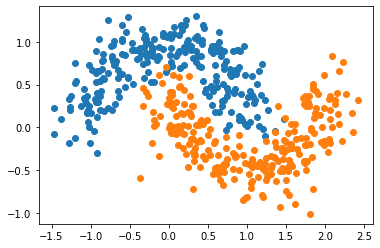

In [67]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.2)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

## Import Javier's custom function:

In [70]:
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .01
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

In [86]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=6)

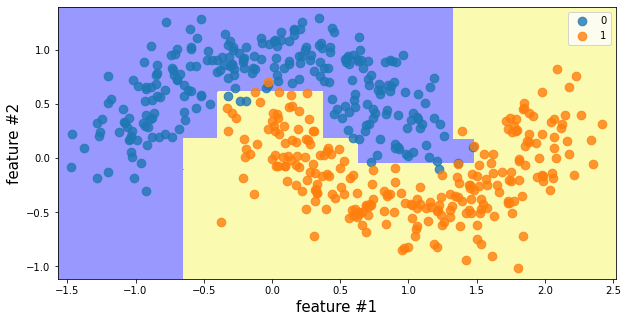

In [87]:
draw_classification_regions(X,y,tree_clf)